In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import IPython.display as ipd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow.keras as keras
from sklearn.metrics import classification_report, confusion_matrix


# Example Sounds

In [114]:
RAV = "audio_speech_actors_01-24/"

## Neutral

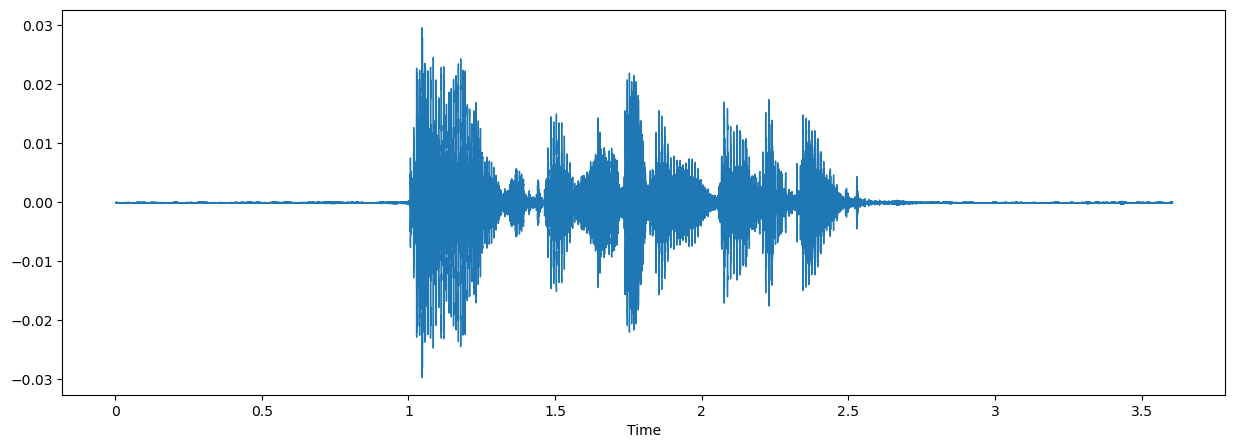

In [112]:
fname = RAV + 'Actor_05/03-01-01-01-02-02-05.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

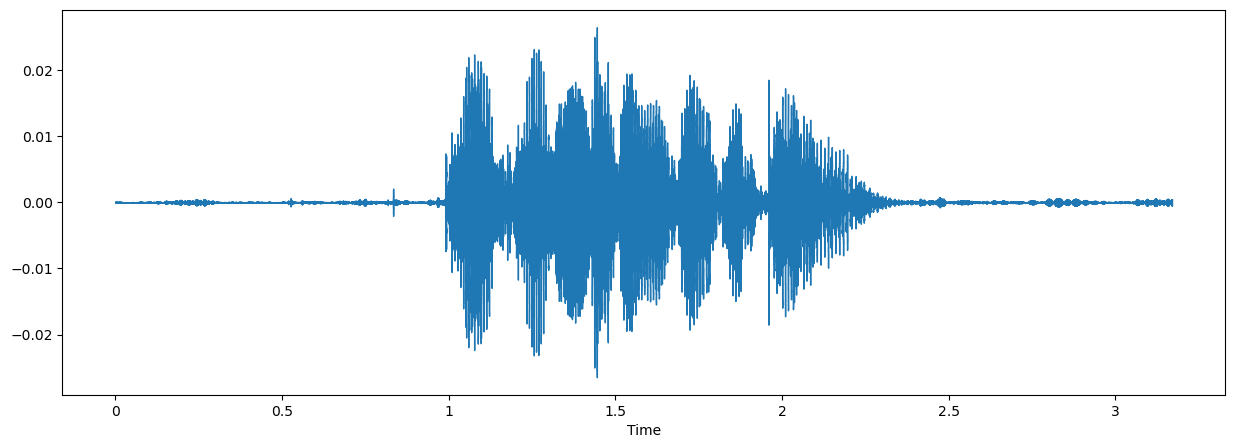

In [87]:
fname = RAV + 'Actor_11/03-01-01-01-02-02-11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

## Calm

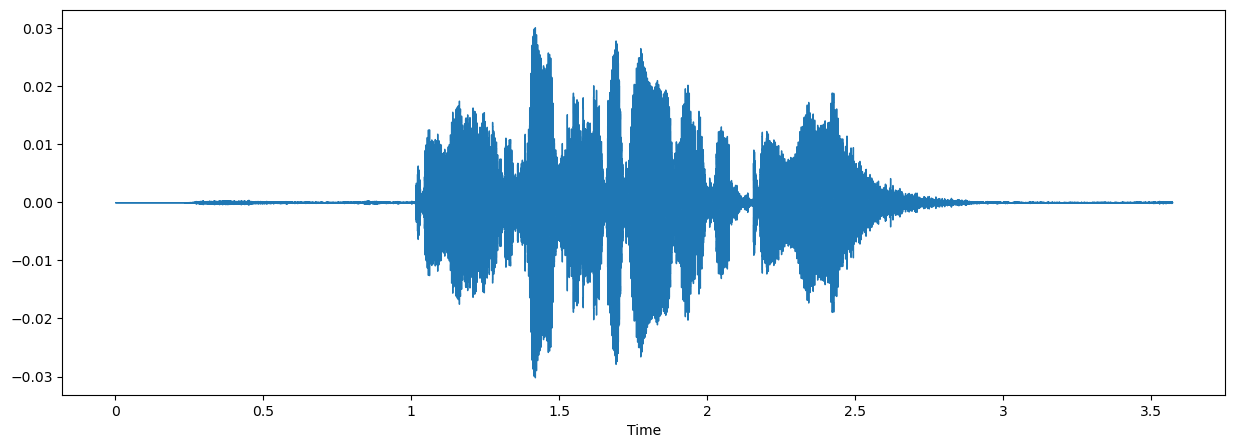

In [88]:
fname = RAV + 'Actor_04/03-01-02-01-02-02-04.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

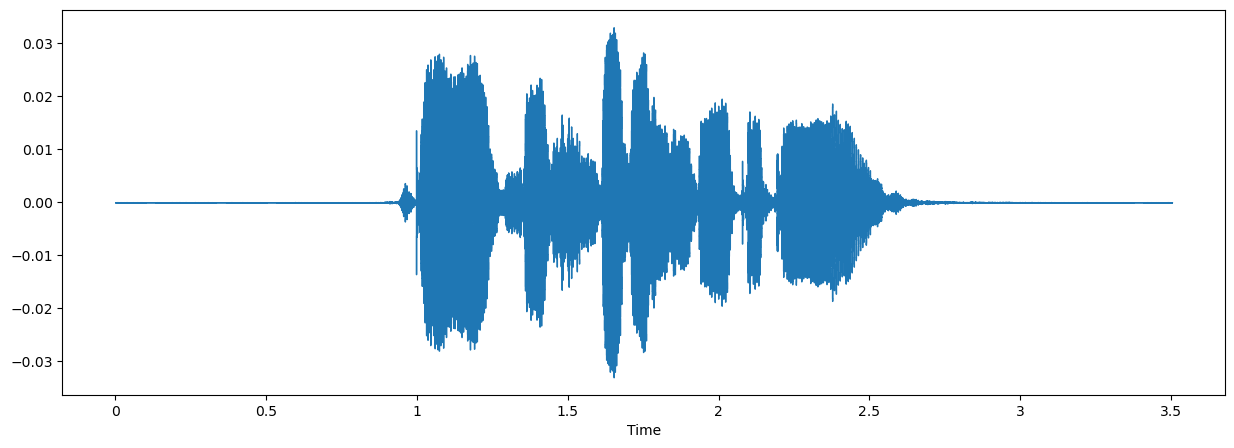

In [89]:
fname = RAV + 'Actor_18/03-01-02-01-02-02-18.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

## Happy

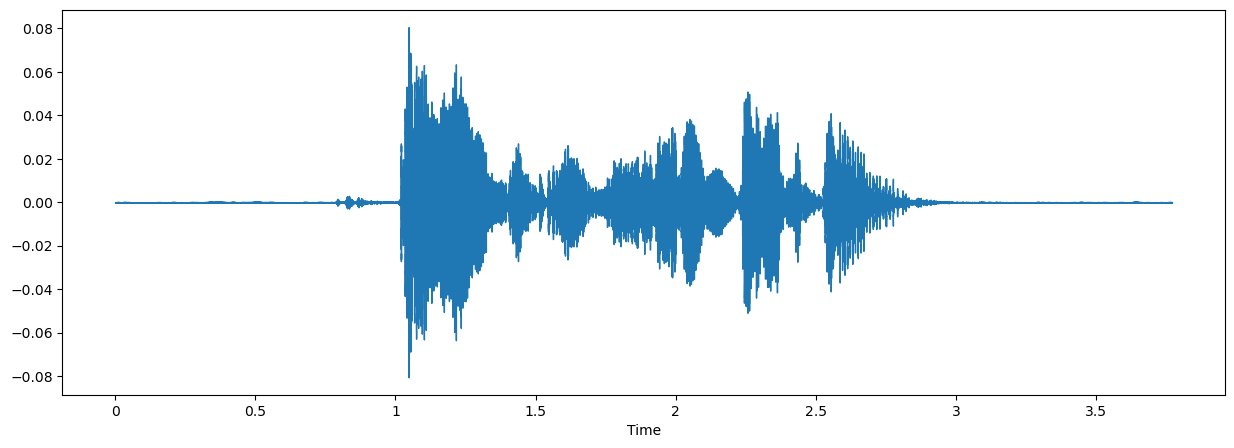

In [90]:
fname = RAV + 'Actor_05/03-01-03-01-02-02-05.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

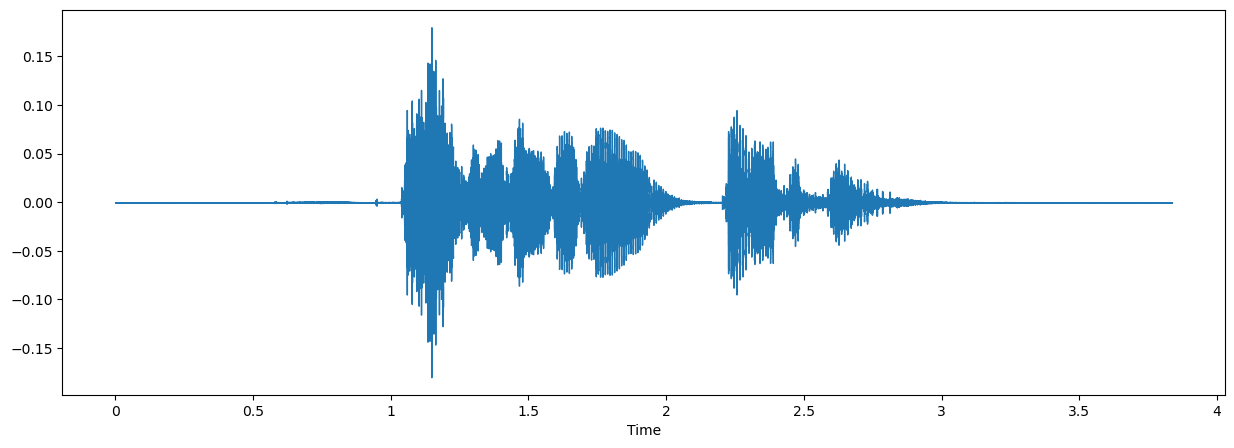

In [91]:
fname = RAV + 'Actor_21/03-01-03-01-02-02-21.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

## Sad

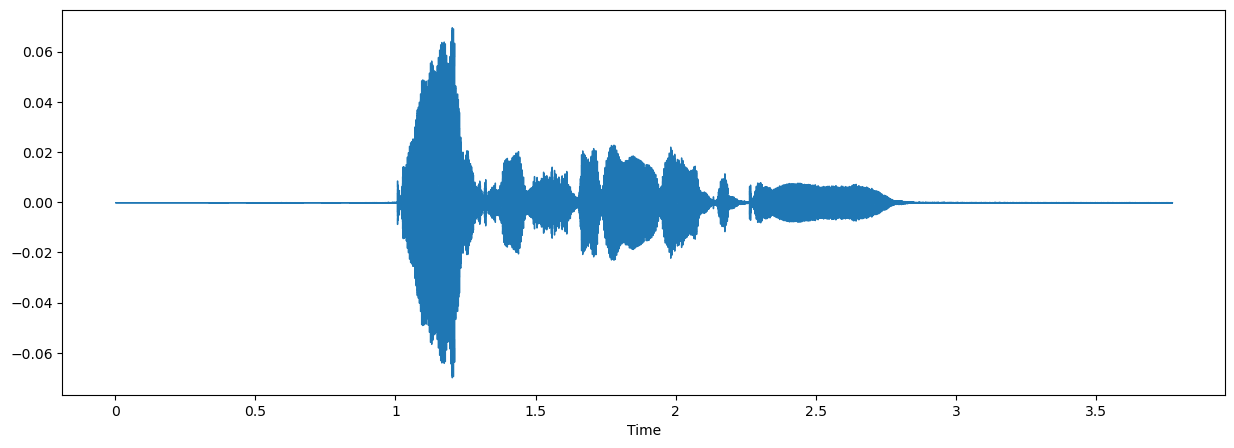

In [92]:
fname = RAV + 'Actor_02/03-01-04-01-02-02-02.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

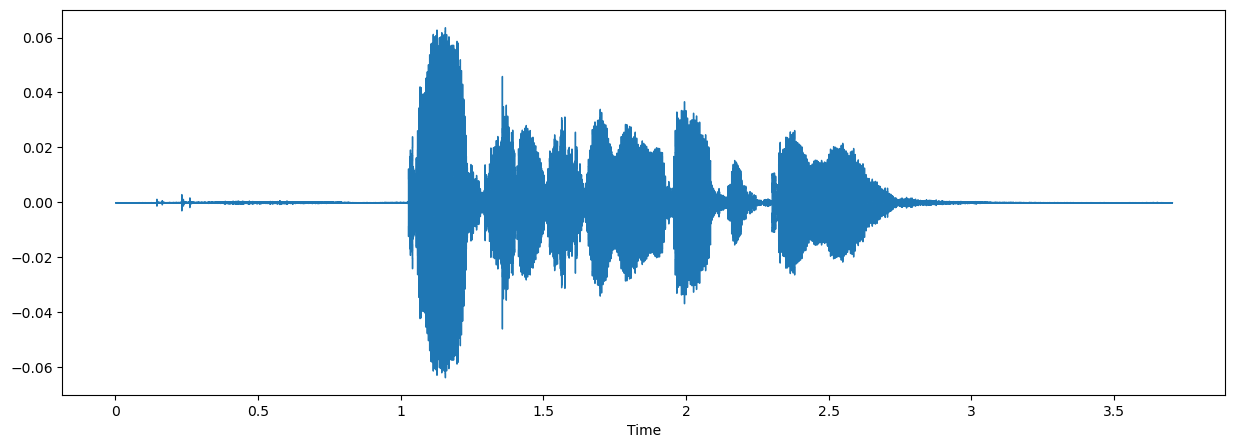

In [93]:
fname = RAV + 'Actor_22/03-01-04-01-02-02-22.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

## Fear

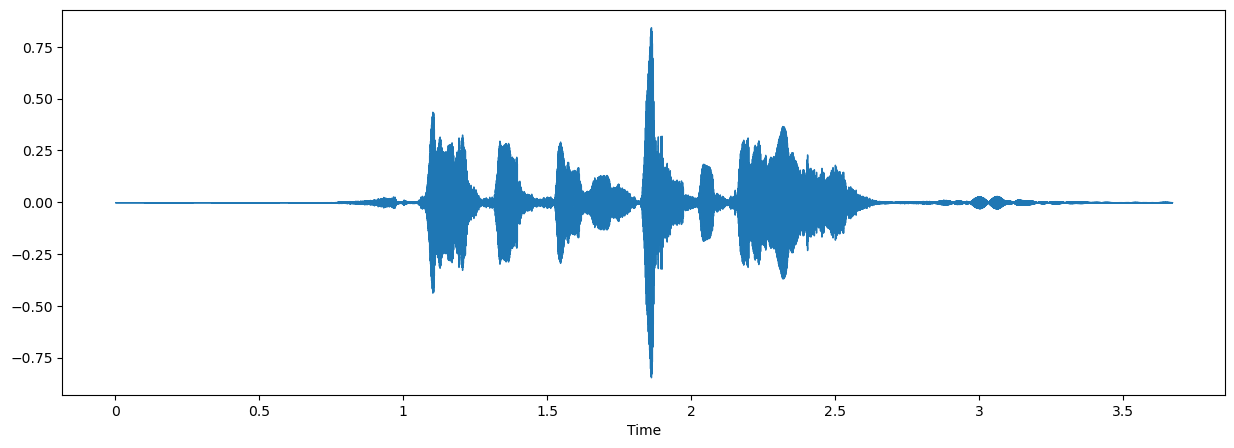

In [94]:
fname = RAV + 'Actor_12/03-01-06-02-02-02-12.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

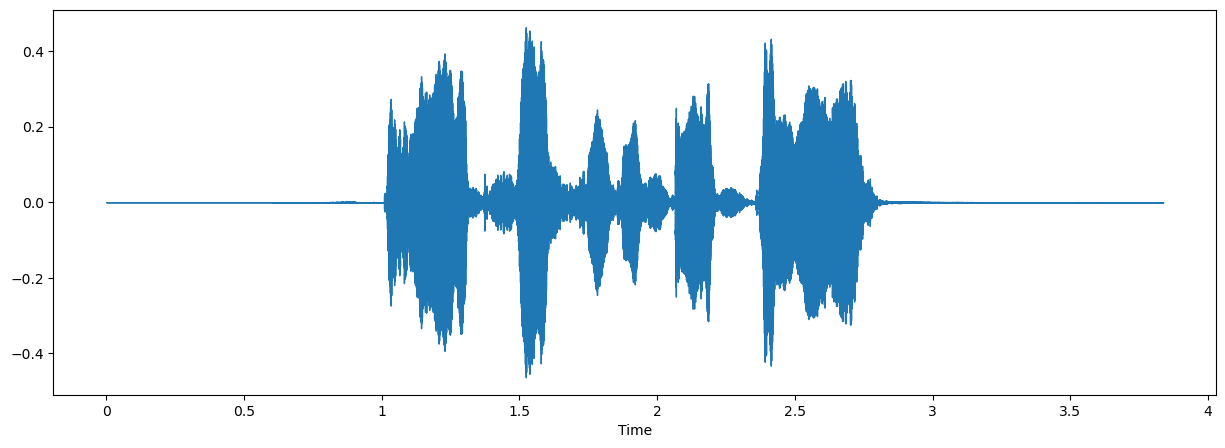

In [95]:
import librosa.display

fname = RAV + 'Actor_24/03-01-06-02-02-02-24.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

## Angry

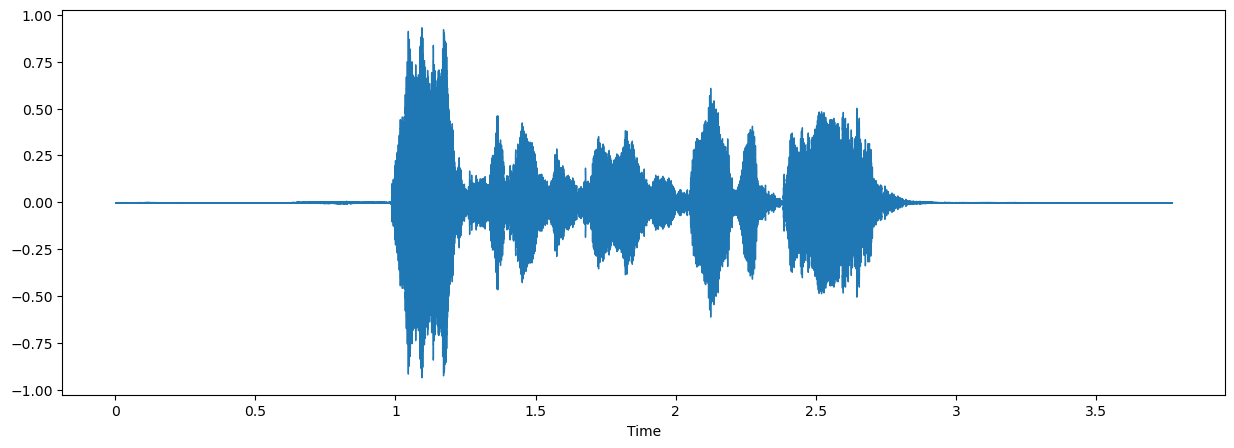

In [96]:
fname = RAV + 'Actor_11/03-01-05-02-02-02-11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

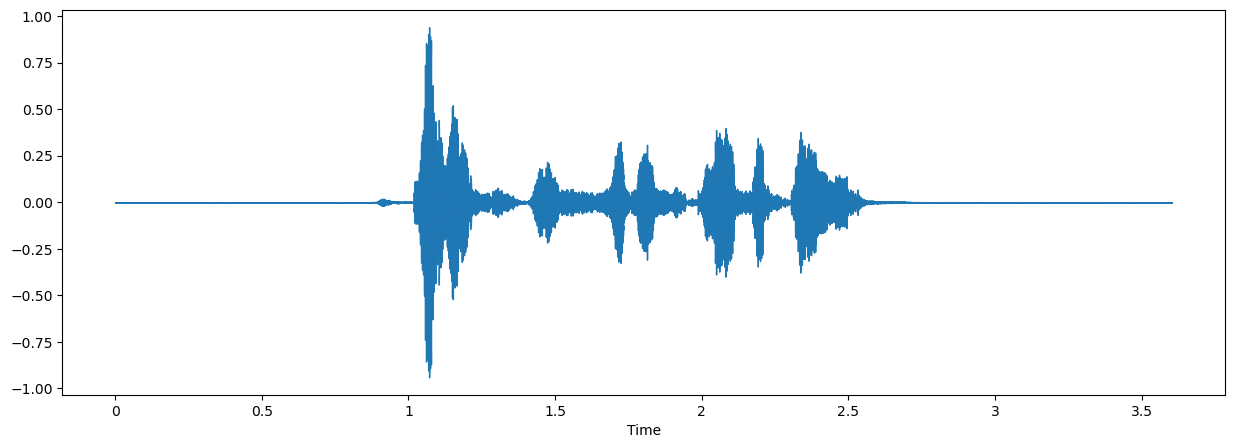

In [97]:
fname = RAV + 'Actor_15/03-01-05-02-02-02-15.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

## Disgust

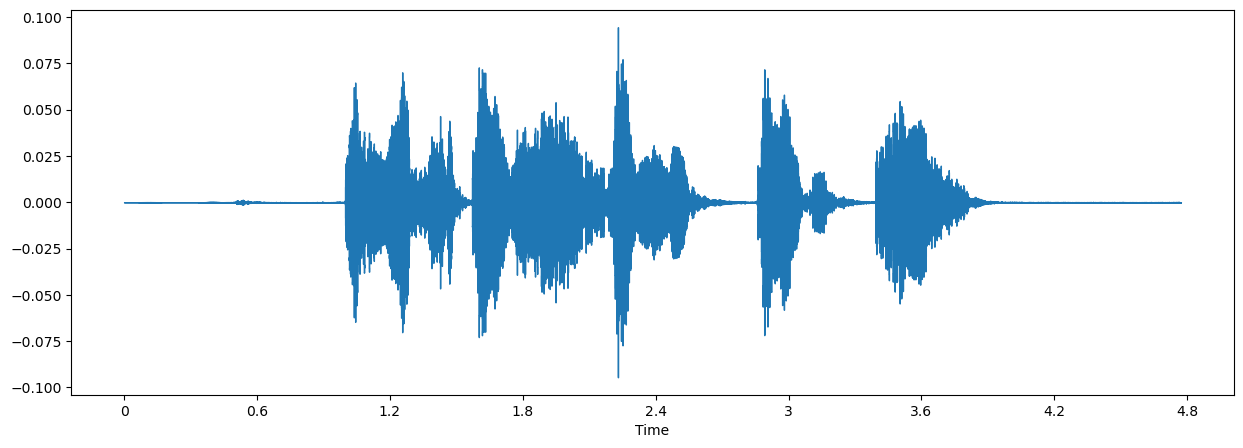

In [98]:
fname = RAV + 'Actor_07/03-01-07-02-02-02-07.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

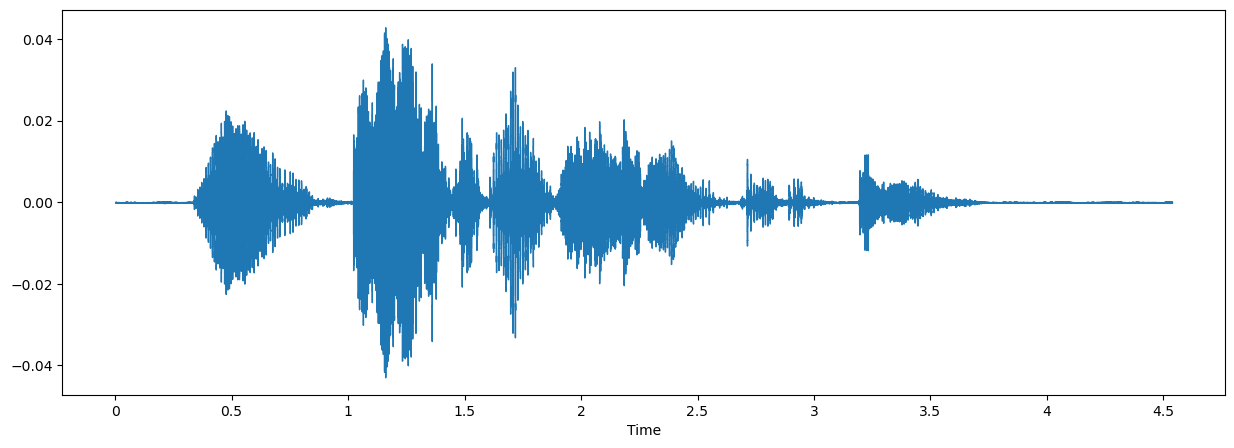

In [99]:
fname = RAV + 'Actor_05/03-01-07-02-02-02-05.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

## Surprised

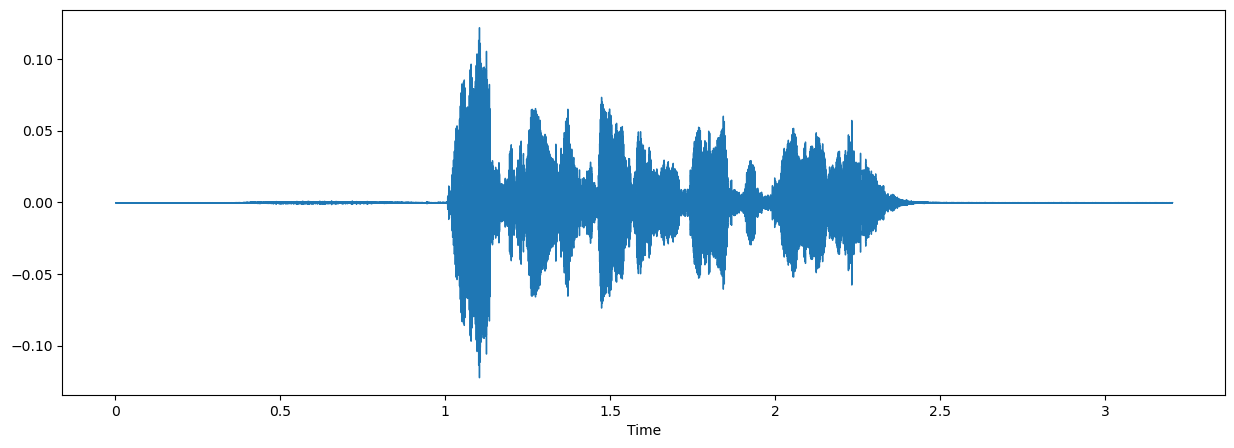

In [100]:
fname = RAV + 'Actor_06/03-01-08-02-02-02-06.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

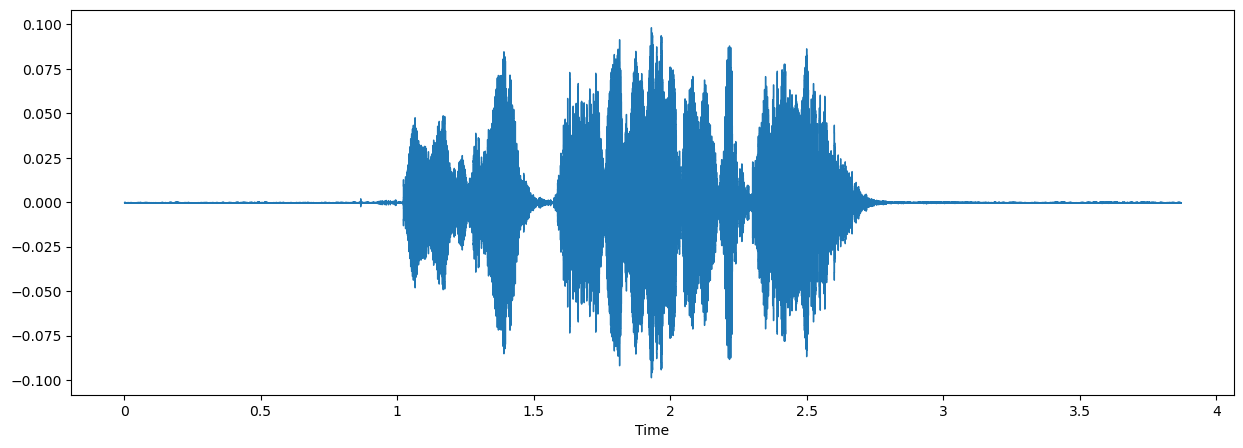

In [101]:
fname = RAV + 'Actor_08/03-01-08-02-02-02-08.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

# Feature Extraction

In [82]:
RAV_DIR = "audio_speech_actors_01-24/"

def extract_ravdess_data(filename, base_path=RAV_DIR):
    """Extracts relevant data from a RAVDESS filename."""

    parts = filename.split('.')[0].split('-')

    # extract the actor number
    actor_match = re.search(r'(\d+)\.wav$', filename)
    if actor_match:
        actor = int(actor_match.group(1))
    else:
      actor = 0 

    emotion_map = {
        '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
        '05': 'angry', '06': 'fear', '07': 'disgust', '08': 'surprise'
    }

    gender_map = {
       i: 'male' if i % 2 != 0 else 'female' for i in range(1,25)
    }

    return {
        'path': os.path.join(base_path, filename),
        'emotion': emotion_map.get(parts[2], "unknown"),
        'gender': gender_map.get(actor, "unknown"),
    }


def extract_mfccs(audio_path, n_mfcc=40):
    """Extracts MFCCs from an audio file."""
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs


def pad_mfccs(mfccs, max_frames=200):
    """Pads or truncates MFCCs to a maximum length."""
    num_frames = mfccs.shape[1]
    if num_frames < max_frames:
        padding_width = max_frames - num_frames
        padded_mfccs = np.pad(mfccs, pad_width=((0, 0), (0, padding_width)), mode='constant')
    elif num_frames > max_frames:
        padded_mfccs = mfccs[:, :max_frames]
    else:
      padded_mfccs = mfccs
    return padded_mfccs

# Get all audio files from all actor directories in one flat list
file_paths = []
for i in os.listdir(RAV_DIR):
  full_dir = os.path.join(RAV_DIR,i)
  if os.path.isdir(full_dir):
      for file_name in os.listdir(full_dir):
        if file_name.endswith(".wav"):
          file_paths.append(os.path.join(i, file_name))


# Create a DataFrame using the apply method for efficient data extraction
rav_df = pd.DataFrame([extract_ravdess_data(file_name) for file_name in file_paths])

# Create 'labels' column
rav_df['labels'] = rav_df['gender'] + '_' + rav_df['emotion']



# Store MFCCs
max_frames = 200 # number of frames to be used
n_mfcc = 40 # Define number of MFCC components
mfcc_data = {}


# Extract MFCCs and store in separate dictionary
for index, row in rav_df.iterrows():
    audio_path = row['path']
    mfccs = extract_mfccs(audio_path)
    padded_mfccs = pad_mfccs(mfccs, max_frames=max_frames)
    mfcc_data[index] = padded_mfccs

# Print the value counts of labels
print(rav_df['labels'].value_counts())

print(rav_df.head())

print("\nMFCC data shape for first 5 audio files:")
for i in range(5):
  print(f"Index {i}: {mfcc_data[i].shape}")

labels
male_calm          96
male_happy         96
male_sad           96
male_angry         96
male_fear          96
male_disgust       96
male_surprise      96
female_calm        96
female_happy       96
female_sad         96
female_angry       96
female_fear        96
female_disgust     96
female_surprise    96
male_neutral       48
female_neutral     48
Name: count, dtype: int64
                                                path  emotion gender  \
0  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
1  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
2  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
3  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
4  audio_speech_actors_01-24/Actor_01\03-01-02-01...     calm   male   

         labels  
0  male_neutral  
1  male_neutral  
2  male_neutral  
3  male_neutral  
4     male_calm  

MFCC data shape for first 5 audio files:
Index 0: (40, 200)
Index 1: (40,

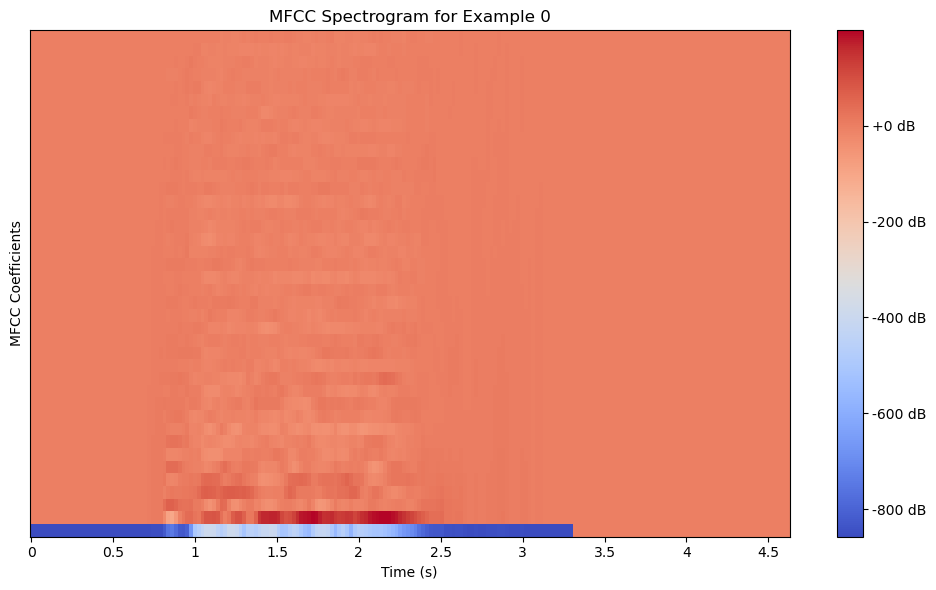

In [83]:
# an example to visualize
example_mfcc = mfcc_data[0]

# Plot the MFCC
plt.figure(figsize=(10, 6))
librosa.display.specshow(example_mfcc, sr=22050, x_axis='time', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title(f"MFCC Spectrogram for Example {0}")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.tight_layout()
plt.show()

In [84]:
rav_df.head(10)

path  emotion gender  \
0  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
1  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
2  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
3  audio_speech_actors_01-24/Actor_01\03-01-01-01...  neutral   male   
4  audio_speech_actors_01-24/Actor_01\03-01-02-01...     calm   male   
5  audio_speech_actors_01-24/Actor_01\03-01-02-01...     calm   male   
6  audio_speech_actors_01-24/Actor_01\03-01-02-01...     calm   male   
7  audio_speech_actors_01-24/Actor_01\03-01-02-01...     calm   male   
8  audio_speech_actors_01-24/Actor_01\03-01-02-02...     calm   male   
9  audio_speech_actors_01-24/Actor_01\03-01-02-02...     calm   male   

         labels  
0  male_neutral  
1  male_neutral  
2  male_neutral  
3  male_neutral  
4     male_calm  
5     male_calm  
6     male_calm  
7     male_calm  
8     male_calm  
9     male_calm

# Training the Models

## SVM

In [102]:
# Prepare MFCC data into numpy array
num_rows = len(rav_df)
all_mfccs = np.zeros(shape=(num_rows, n_mfcc, max_frames), dtype=np.float32)
for i in range(num_rows):
  all_mfccs[i] = mfcc_data[i]



In [103]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(rav_df['labels'])
categorical_labels = to_categorical(encoded_labels)
print(label_encoder.classes_)
# Split into training/test sets
X_train, X_test, y_train, y_test = train_test_split(all_mfccs, categorical_labels, test_size=0.2, random_state=42, shuffle=True)


['female_angry' 'female_calm' 'female_disgust' 'female_fear'
 'female_happy' 'female_neutral' 'female_sad' 'female_surprise'
 'male_angry' 'male_calm' 'male_disgust' 'male_fear' 'male_happy'
 'male_neutral' 'male_sad' 'male_surprise']


In [104]:
# Normalize the features
mean = np.mean(X_train, axis=(0, 2))
std = np.std(X_train, axis=(0, 2))
X_train = (X_train - mean[:, None]) / std[:, None]
X_test = (X_test - mean[:, None]) / std[:, None]

SVM Accuracy: 0.5590277777777778


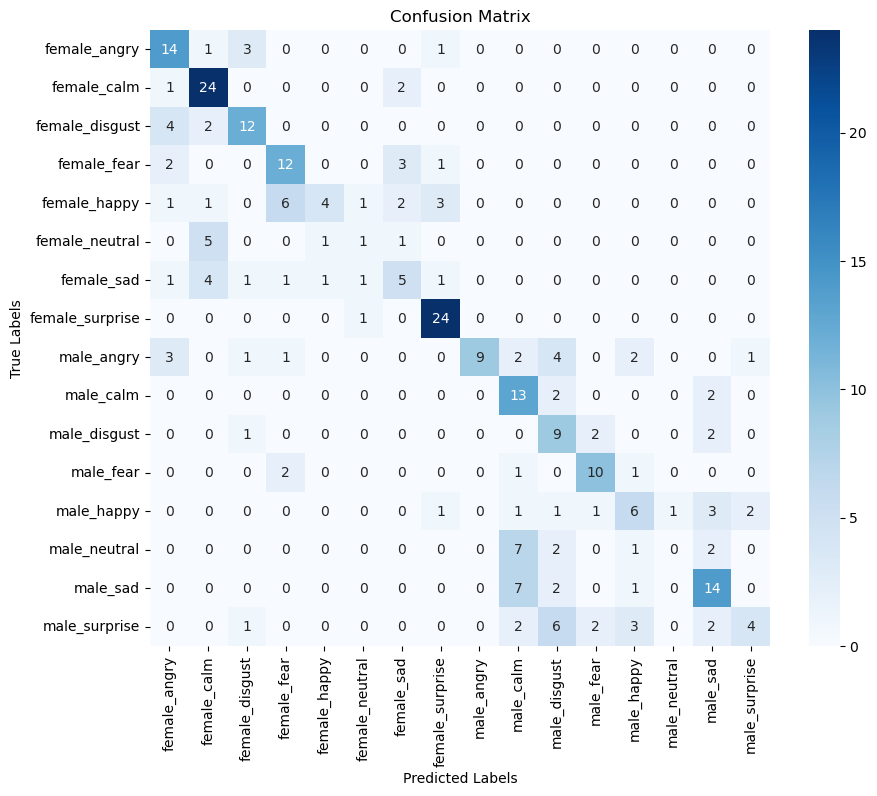

Classification Report:
                  precision    recall  f1-score   support

   female_angry       0.54      0.74      0.62        19
    female_calm       0.65      0.89      0.75        27
 female_disgust       0.63      0.67      0.65        18
    female_fear       0.55      0.67      0.60        18
   female_happy       0.67      0.22      0.33        18
 female_neutral       0.25      0.12      0.17         8
     female_sad       0.38      0.33      0.36        15
female_surprise       0.77      0.96      0.86        25
     male_angry       1.00      0.39      0.56        23
      male_calm       0.39      0.76      0.52        17
   male_disgust       0.35      0.64      0.45        14
      male_fear       0.67      0.71      0.69        14
     male_happy       0.43      0.38      0.40        16
   male_neutral       0.00      0.00      0.00        12
       male_sad       0.56      0.58      0.57        24
  male_surprise       0.57      0.20      0.30        20

     

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_train_reshaped = X_train.copy()
X_test_reshaped = X_test.copy()
y_train_svm = y_train.copy()  
y_test_svm = y_test.copy()  

# Reshape MFCCs for SVM 
num_samples_train, n_mfcc, max_frames = X_train_reshaped.shape
X_train_reshaped = X_train_reshaped.reshape((num_samples_train, n_mfcc * max_frames))
num_samples_test, n_mfcc, max_frames = X_test_reshaped.shape
X_test_reshaped = X_test_reshaped.reshape((num_samples_test, n_mfcc * max_frames))

# Convert one-hot encoded labels to single integer labels for SVM
y_train_svm = np.argmax(y_train_svm, axis=1)
y_test_svm = np.argmax(y_test_svm, axis=1)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_reshaped, y_train_svm)

# Evaluate the SVM model
y_pred = svm_model.predict(X_test_reshaped)
accuracy = accuracy_score(y_test_svm, y_pred)
print(f'SVM Accuracy: {accuracy}')

# Confusion Matrix
cm = confusion_matrix(y_test_svm, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Classification Report
report = classification_report(y_test_svm, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

## CNN

In [106]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(n_mfcc, max_frames, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(encoded_labels)), activation='softmax')  # Output shape: number of unique labels
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data to add a channel dimension
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

D:\Miniconda\envs\my_environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
# Train the model
model_history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Save model and weights

model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved model and weights at %s ' % model_path)

# Save model architecture
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.1047 - loss: 2.8345 - val_accuracy: 0.2208 - val_loss: 2.4559
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.1762 - loss: 2.4208 - val_accuracy: 0.2468 - val_loss: 2.2580
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.2288 - loss: 2.2127 - val_accuracy: 0.2987 - val_loss: 2.2080
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3521 - loss: 2.0271 - val_accuracy: 0.3593 - val_loss: 1.9608
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3772 - loss: 1.8593 - val_accuracy: 0.3810 - val_loss: 1.8019
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4373 - loss: 1.6229 - val_accuracy: 0.4156 - val_loss: 1.7232
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.4933 - loss: 1.4443 - val_accuracy: 0.4632 - val_loss: 1.5566
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5649 - loss: 1.1839 - val_accuracy: 0.4502 - v

Test Loss: 2.0133
Test Accuracy: 0.6042
Saved model and weights at D:\Jupyter Notebook Files\DM_Project\saved_models\Emotion_Model.h5 


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


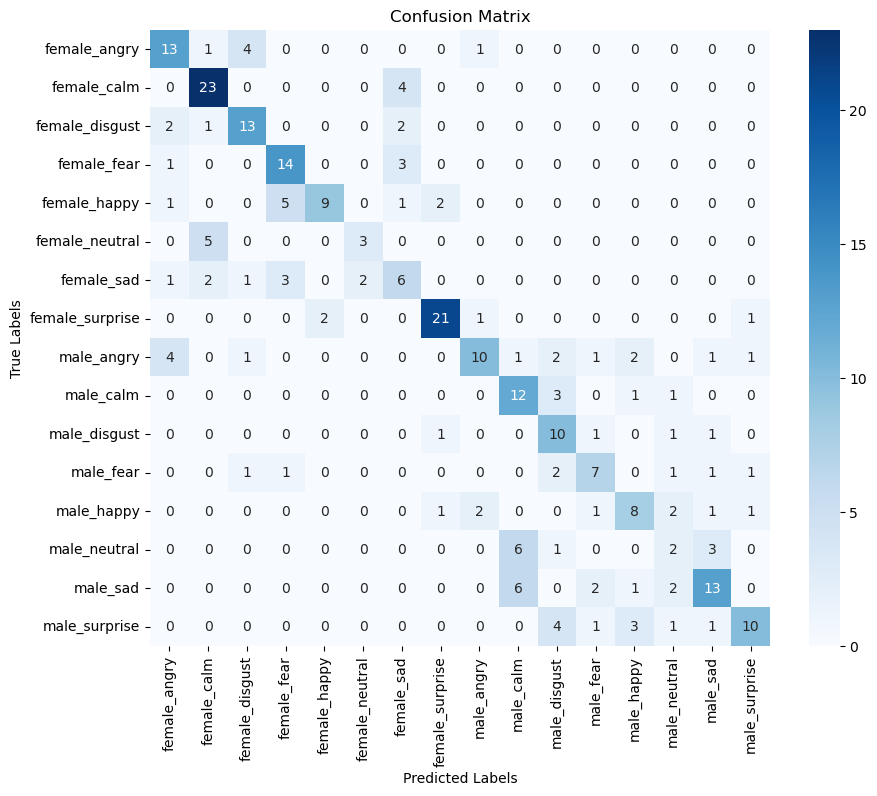


Classification Report:
                 precision    recall  f1-score   support

   female_angry       0.59      0.68      0.63        19
    female_calm       0.72      0.85      0.78        27
 female_disgust       0.65      0.72      0.68        18
    female_fear       0.61      0.78      0.68        18
   female_happy       0.82      0.50      0.62        18
 female_neutral       0.60      0.38      0.46         8
     female_sad       0.38      0.40      0.39        15
female_surprise       0.84      0.84      0.84        25
     male_angry       0.71      0.43      0.54        23
      male_calm       0.48      0.71      0.57        17
   male_disgust       0.45      0.71      0.56        14
      male_fear       0.54      0.50      0.52        14
     male_happy       0.53      0.50      0.52        16
   male_neutral       0.20      0.17      0.18        12
       male_sad       0.62      0.54      0.58        24
  male_surprise       0.71      0.50      0.59        20

     

In [108]:
# Predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create a DataFrame of actual and predicted labels
preds = label_encoder.inverse_transform(y_pred_classes)
actual = label_encoder.inverse_transform(y_true_classes)

# Plot Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


In [109]:
finaldf = pd.DataFrame({'actualvalues': actual, 'predictedvalues': preds})
print("\nSample Predictions:")
finaldf.head(10)



Sample Predictions:


actualvalues predictedvalues
0     male_disgust    male_disgust
1        male_calm       male_calm
2      female_calm      female_sad
3      female_calm     female_calm
4       male_angry      male_angry
5        male_calm    male_neutral
6      female_calm     female_calm
7      female_fear     female_fear
8  female_surprise    female_happy
9        male_calm       male_calm

## Gender-based speech recognition

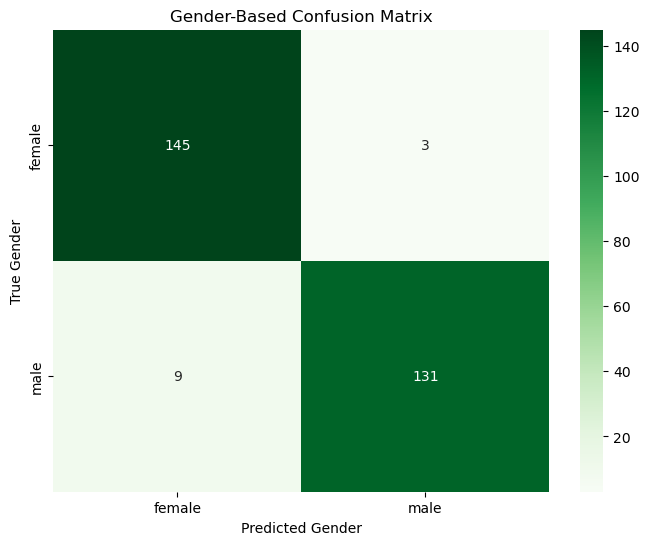

              precision    recall  f1-score   support

      female       0.94      0.98      0.96       148
        male       0.98      0.94      0.96       140

    accuracy                           0.96       288
   macro avg       0.96      0.96      0.96       288
weighted avg       0.96      0.96      0.96       288



In [110]:
# Modify DataFrame for gender-based analysis
dfcopy = finaldf.copy()
dfcopy['actualvalues'] = finaldf.actualvalues.replace({
    'female_angry': 'female', 'female_disgust': 'female', 'female_fear': 'female',
    'female_happy': 'female', 'female_sad': 'female', 'female_surprise': 'female',
    'female_neutral': 'female', 'female_calm': 'female',  'male_angry': 'male', 'male_disgust': 'male',
    'male_fear': 'male', 'male_happy': 'male', 'male_sad': 'male',
    'male_surprise': 'male', 'male_neutral': 'male', 'male_calm': 'male'
})

dfcopy['predictedvalues'] = finaldf.predictedvalues.replace({
    'female_angry': 'female', 'female_disgust': 'female', 'female_fear': 'female',
    'female_happy': 'female', 'female_sad': 'female', 'female_surprise': 'female',
    'female_neutral': 'female', 'female_calm': 'female', 'male_angry': 'male', 'male_disgust': 'male',
    'male_fear': 'male', 'male_happy': 'male', 'male_sad': 'male',
    'male_surprise': 'male', 'male_neutral': 'male', 'male_calm': 'male'
})

# Gender-based Confusion Matrix
classes = dfcopy.actualvalues.unique()
classes.sort()

c = confusion_matrix(dfcopy.actualvalues, dfcopy.predictedvalues)
plt.figure(figsize=(8, 6))
sns.heatmap(c, annot=True, fmt="d", cmap="Greens", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Gender')
plt.ylabel('True Gender')
plt.title('Gender-Based Confusion Matrix')
plt.show()

# Classification report 
classes = dfcopy.actualvalues.unique()
classes.sort()    
print(classification_report(dfcopy.actualvalues, dfcopy.predictedvalues, target_names=classes))


## Emotion-based speech recognition

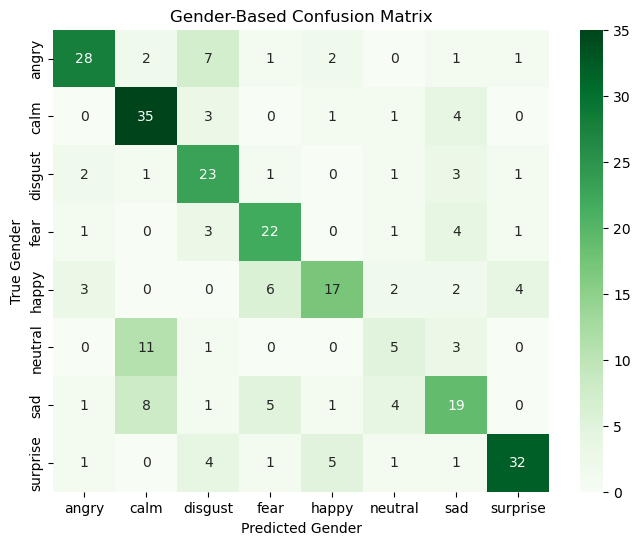

              precision    recall  f1-score   support

       angry       0.78      0.67      0.72        42
        calm       0.61      0.80      0.69        44
     disgust       0.55      0.72      0.62        32
        fear       0.61      0.69      0.65        32
       happy       0.65      0.50      0.57        34
     neutral       0.33      0.25      0.29        20
         sad       0.51      0.49      0.50        39
    surprise       0.82      0.71      0.76        45

    accuracy                           0.63       288
   macro avg       0.61      0.60      0.60       288
weighted avg       0.63      0.63      0.63       288



In [111]:
dfcopy = finaldf.copy()

dfcopy['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'female_calm':'calm'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                       , 'male_calm':'calm'
                                      })

dfcopy['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'female_calm':'calm'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                       , 'male_calm':'calm'
                                      })

# Emotion-based Confusion Matrix
classes = dfcopy.actualvalues.unique()
classes.sort()

c = confusion_matrix(dfcopy.actualvalues, dfcopy.predictedvalues)
plt.figure(figsize=(8, 6))
sns.heatmap(c, annot=True, fmt="d", cmap="Greens", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Gender')
plt.ylabel('True Gender')
plt.title('Emotion-Based Confusion Matrix')
plt.show()

# Classification report 
classes = dfcopy.actualvalues.unique()
classes.sort()    
print(classification_report(dfcopy.actualvalues, dfcopy.predictedvalues, target_names=classes))